
## Rocket Fuel: Measuring the Effectiveness of Online  Advertising

#### Author : Faraz Ahmad (faraza)

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ydata_profiling import ProfileReport

In [238]:
df=pd.read_csv('rocketfuel_data.csv')

#### Description of CSV file data setEach row in the CSV file data set (rocketfuel_data.csv) represents a uniquely identified user in  the ad campaign. For each user, the following six columns are provided.

- user id: Unique identifier of the user

- test: Whether the user was exposed to advertising or was in the control group. 1 if the user was  exposed to the real ad, 0 if the user was in the control group and was shown a PSA.

- converted: Whether the user converted. 1 if the user bought the handbag during the campaign, 0 if  not.

- tot_impr: The total number of ad impressions the user encountered. For users in the control groupthis counts the number of times they encountered the PSA.For exposed users it counts the numberof times they were shown the ad.

- mode_impr_day: Shows the day of the week on which the user encountered the most number of  impressions. 1 means Monday, 7 means Sunday. For example if a given user encountered 2  impressions on Mondays, 3 on Tuesdays, 7 on Wednesdays, 0 on Thursdays and, Fridays, 9 on  Saturdays and 2 on Sundays, this column takes the value of 6 (Saturday).

- mode_impr_hour: Shows the hour of the day (0-23) in which the user encountered the most  number of impressions

In [239]:
df

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour
0,1069124,1,0,130,1,20
1,1119715,1,0,93,2,22
2,1144181,1,0,21,2,18
3,1435133,1,0,355,2,10
4,1015700,1,0,276,5,14
...,...,...,...,...,...,...
588096,1278437,1,0,1,2,23
588097,1327975,1,0,1,2,23
588098,1038442,1,0,3,2,23
588099,1496395,1,0,1,2,23


In [240]:
df.describe()

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour
count,5.881010e+05,588101.000000,588101.000000,588101.000000,588101.000000,588101.000000
mean,1.310692e+06,0.960000,0.025239,24.820876,4.025533,14.469061
std,2.022260e+05,0.195959,0.156850,43.715181,2.004019,4.834634
min,9.000000e+05,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.143190e+06,1.000000,0.000000,4.000000,2.000000,11.000000
50%,1.313725e+06,1.000000,0.000000,13.000000,4.000000,14.000000
75%,1.484088e+06,1.000000,0.000000,27.000000,6.000000,18.000000
max,1.654483e+06,1.000000,1.000000,2065.000000,7.000000,23.000000


In [241]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### User Analysis

In [242]:
total_users = len(df)

exposed_group = df[df['test'] == 1]
num_exposed_group = len(exposed_group)
control_group = df[df['test'] == 0]
num_control_group = len(control_group)



print(f"Total users targeted in the campaign: {total_users}")
print(f"No. of users in Exposed Group: {num_exposed_group}")
print(f"No. of users in Control Group: {num_control_group}")
print(f"Percentage of users in Control Group: {percentage_control_group:.2f}%\n")


Total users targeted in the campaign: 588101
No. of users in Exposed Group: 564577
No. of users in Control Group: 23524
Percentage of users in Control Group: 4.00%



### Conversion Analysis

In [243]:
percentage_control_group = (num_control_group / total_users) * 100

converted_exposed_group = exposed_group['converted'].sum()
converted_control_group = control_group['converted'].sum()

percentage_converted_exposed = (converted_exposed_group / num_exposed_group) * 100
percentage_converted_control = (converted_control_group / num_control_group) * 100

difference_percentage = percentage_converted_exposed - percentage_converted_control
exposed_conversion_opportunity = num_exposed_group * (difference_percentage / 100)


print(f"No. of converted users in Exposed Group: {converted_exposed_group}")
print(f"No. of converted users in Control Group: {converted_control_group}")
print(f"Percentage of converted users in Exposed Group: {percentage_converted_exposed:.2f}%")
print(f"Percentage of converted users in Control Group: {percentage_converted_control:.2f}%")
print(f"Difference in percentage of converted users in both groups is {difference_percentage:.2f}%.")
print(f"No. of users from Exposed Group that could have converted due to the campaign: {exposed_conversion_opportunity:.2f}")


No. of converted users in Exposed Group: 14423
No. of converted users in Control Group: 420
Percentage of converted users in Exposed Group: 2.55%
Percentage of converted users in Control Group: 1.79%
Difference in percentage of converted users in both groups is 0.77%.
No. of users from Exposed Group that could have converted due to the campaign: 4342.98


## Question 1 - Was the advertising campaign effective? Did additional consumers convert as a result of the ad campaign? 

The advertising campaign was effective, as it led to additional consumers converting. The exposed group showed a higher conversion rate of 2.55% compared to the control group which had a conversion rate of 1.79%, suggesting that the campaign had a positive influence on user behavior. These metrics showcase the success of the campaign. 

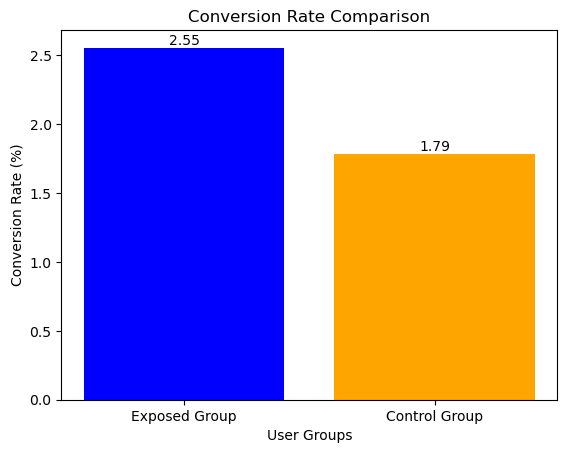

In [244]:
categories = ['Exposed Group', 'Control Group']
conversion_rates = [percentage_converted_exposed, percentage_converted_control]

fig, ax = plt.subplots()
bars = ax.bar(categories, conversion_rates, color=['blue', 'orange'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.title('Conversion Rate Comparison')
plt.xlabel('User Groups')
plt.ylabel('Conversion Rate (%)')
plt.show()

## Question 2- Was the campaign profitable
- a. How much more money did TaskaBella make by running the campaign  (excluding advertising costs)


- b. What was the cost of the campaign? 
- c. Calculate the ROI of the campaign. Was the campaign profitable?
- d. What was the opportunity cost of including a control group; how much more  could have TaskaBella made with a smaller control group or not having a control  group at all?

In [245]:
#a
## Additional Amount = No. of users from Exposed Group that could have converted due to the campaign * 
# Value of converted user
additional_amount= exposed_conversion_opportunity * 40
print("More money made by running the campaign: $", round(additional_amount,2))

More money made by running the campaign: $ 173719.29


In [246]:
#b
#Cost= Cost = (Total Impressions / 𝟏𝟎𝟎𝟎 * Average cost per thousand impression)
cost= (df['tot_impr'].sum()/1000)*9
print("Cost of the campaign: $",round(cost,2))

Cost of the campaign: $ 131374.64


In [247]:
#c
#ROI =(Profit/ Cost) *100
profit= additional_amount - cost
roi= (profit/cost) * 100
print("ROI: ",round(roi,2),"%")

ROI:  32.23 %


In [248]:
#opportunityCost = (difference in Conversion Percentage/ 100) * no of people in control group * 40
opp_cost= (difference_percentage/100) * num_control_group * 40 
print("Oppurtunity Cost: $",round(opp_cost,2))

Oppurtunity Cost: $ 7238.29


## Question 3- How did the number of impressions seen by each user influence the effectiveness of  advertising?

- a. Create a chart of conversion rates as a function of the number of ads displayed to  users. Plot conversion rates for those who were in the control group and for those  who were exposed to the ad. Group together number of impressions as necessary  to obtain a meaningful plot. (Conversion rate means the percentage of unique  users who made a purchase.)
- b. What can you infer from the charts? In what region is advertising most effective?
- c. What do the above figures imply for the design of the next campaign assuming  that consumer response would be similar?

In [249]:
df['tot_impr'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: tot_impr, dtype: float64

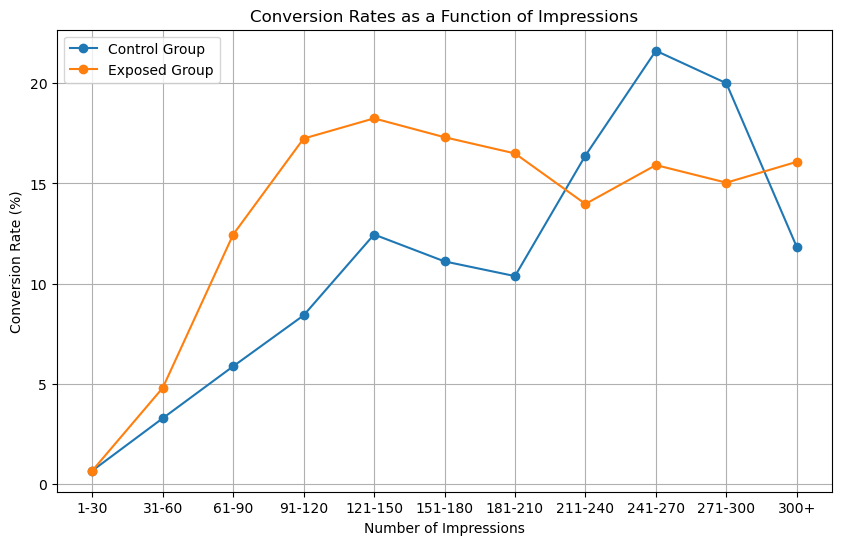

In [250]:

impression_bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270,300 ,float('inf')]
labels = ['1-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240' ,'241-270','271-300', '300+']
df['impression_group'] = pd.cut(df['tot_impr'], bins=impression_bins, labels=labels, right=False)
conversion_rates_control = df[df['test'] == 0].groupby('impression_group')['converted'].mean() * 100
conversion_rates_exposed = df[df['test'] == 1].groupby('impression_group')['converted'].mean() * 100
plt.figure(figsize=(10, 6))
plt.plot(conversion_rates_control.index, conversion_rates_control, marker='o', label='Control Group')
plt.plot(conversion_rates_exposed.index, conversion_rates_exposed, marker='o', label='Exposed Group')
plt.xlabel('Number of Impressions')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rates as a Function of Impressions')
plt.legend()
plt.grid(True)
plt.show()


#### Exposed Group Analysis
- The graph indicates that the majority of conversions occur within the range of 1 to 150 impressions reaching a peak around 150 impressions, with a low impressions-per-conversion ratio in this interval.
- Beyond 120 or 150 impressions, conversions decrease, and the impressions-per-conversion ratio becomes higher. After this point, the conversion rate starts to decline, stabilizing at approximately 15%.
- The optimal range for the best results appears to be between 30 and 150 impressions per user.
- Initially, as the number of impressions increases, the conversion rate rises, but a turning point is observed around 150 impressions, after which more impressions lead to a lower conversion rate.

#### Control Group Analysis


- An intriguing trend is observed where, despite no ads being served (only PSAs), the conversion rate increases until 150 impressions, then experiences a dip, followed by an increase again from 210 to 270 impressions.

- Both the control and exposed groups show an increasing conversion trend up to 150 impressions with the exposed group having a more pronounced increase. 

- However, in the control group, although the conversion rate increases again from 210 to 270 impressions, the number of impressions per conversion is high, and the actual conversions are relatively low.
- Therefore, the opportunity cost of increasing the number of impressions for a lower number of actual conversions may not be beneficial.

Advertising seems to be the most effective in the range of 91 to 180 with the optimal peak obtained during the range of 121-150 impressions. 

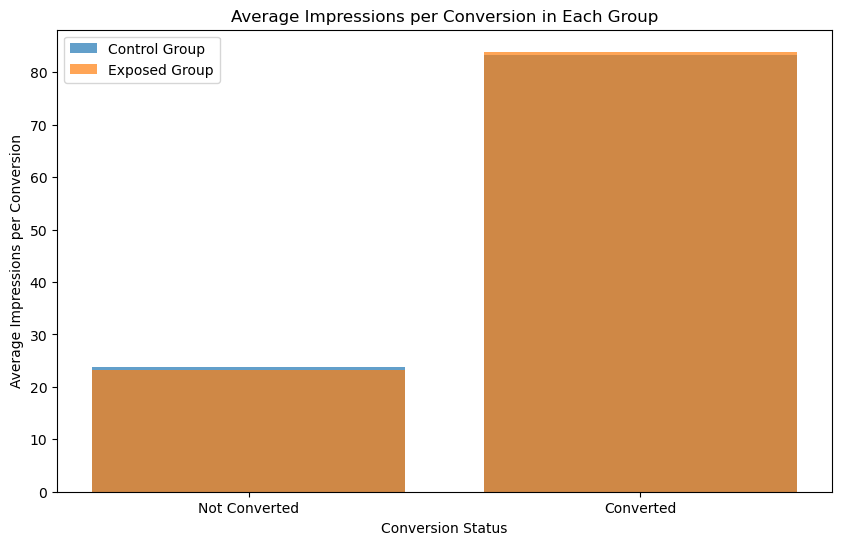

In [251]:
avg_impressions_control = control_group.groupby('converted')['tot_impr'].mean()
avg_impressions_exposed = exposed_group.groupby('converted')['tot_impr'].mean()
plt.figure(figsize=(10, 6))
plt.bar(avg_impressions_control.index, avg_impressions_control, label='Control Group', alpha=0.7)
plt.bar(avg_impressions_exposed.index, avg_impressions_exposed, label='Exposed Group', alpha=0.7)
plt.xlabel('Conversion Status')
plt.ylabel('Average Impressions per Conversion')
plt.title('Average Impressions per Conversion in Each Group')
plt.xticks([0, 1], ['Not Converted', 'Converted'])
plt.legend()
plt.show()

#### Recommendations
- Keep the number of impressions per user in the range of 1 to 150. after 150 impressions the conversion pattern reverses meaning that the average number of impressions shown per conversion increases suggesting advertising becoming less effective. 
- Instead of increasing the impressions beyond 150, engage more users in the campaign


### Question-3 How does consumer response to advertising vary on different days of the week and at  different times of the day?

- a. Create a chart with the conversion rates for the control group and the exposed  group as a function of the day of week when they were shown the most  impressions.
- b. Create the same chart for hours within a day (excluding the period between  midnight and 8 a.m.).
- c. What days/hours is advertising most/least effective?

In [252]:
df

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour,impression_group
0,1069124,1,0,130,1,20,121-150
1,1119715,1,0,93,2,22,91-120
2,1144181,1,0,21,2,18,1-30
3,1435133,1,0,355,2,10,300+
4,1015700,1,0,276,5,14,271-300
...,...,...,...,...,...,...,...
588096,1278437,1,0,1,2,23,1-30
588097,1327975,1,0,1,2,23,1-30
588098,1038442,1,0,3,2,23,1-30
588099,1496395,1,0,1,2,23,1-30


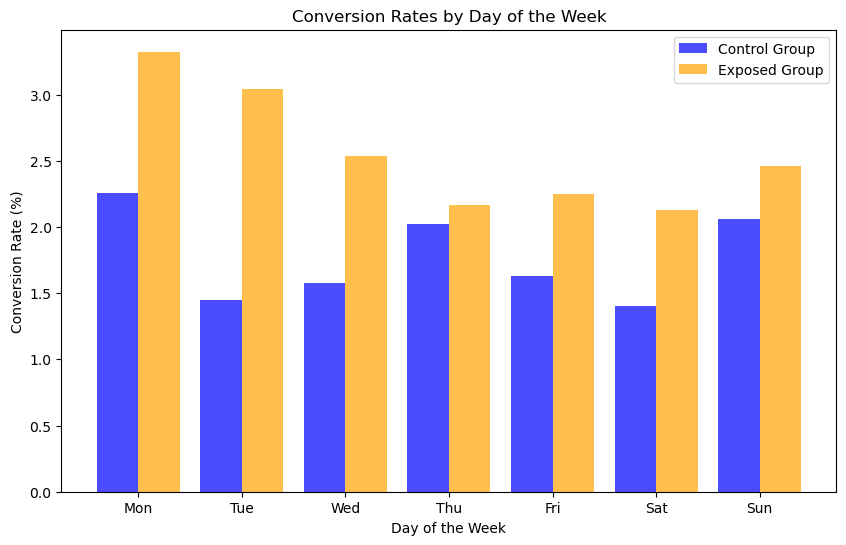

In [253]:
conversion_rates = df.groupby(['test', 'mode_impr_day'])['converted'].mean() * 100
control_conversion_rates = conversion_rates[0]
exposed_conversion_rates = conversion_rates[1]
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(1, 8)
plt.bar(index, control_conversion_rates, width=bar_width, label='Control Group', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index], exposed_conversion_rates, width=bar_width, label='Exposed Group', color='orange', alpha=0.7)
plt.xlabel('Day of the Week')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rates by Day of the Week')
plt.xticks([i + bar_width / 2 for i in index], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun'])
plt.legend()
plt.show()

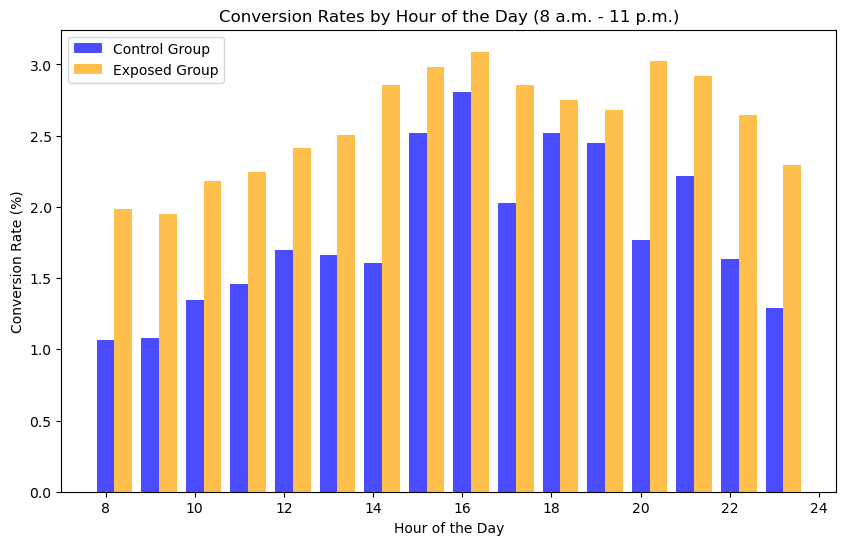

In [254]:
df = df[(df['mode_impr_hour']>= 8) & (df['mode_impr_hour'] < 24)]

conversion_rates = df.groupby(['test', 'mode_impr_hour'])['converted'].mean() * 100
control_conversion_rates = conversion_rates[0]
exposed_conversion_rates = conversion_rates[1]

plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(8, 24) 
plt.bar(index, control_conversion_rates, width=bar_width, label='Control Group', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index], exposed_conversion_rates, width=bar_width, label='Exposed Group', color='orange', alpha=0.7)

plt.xlabel('Hour of the Day')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rates by Hour of the Day (8 a.m. - 11 p.m.)')
plt.legend()
plt.show()

- Another important factor would be to look at the number of impressions on each of these days before a decision is made about the best day to advertise. 

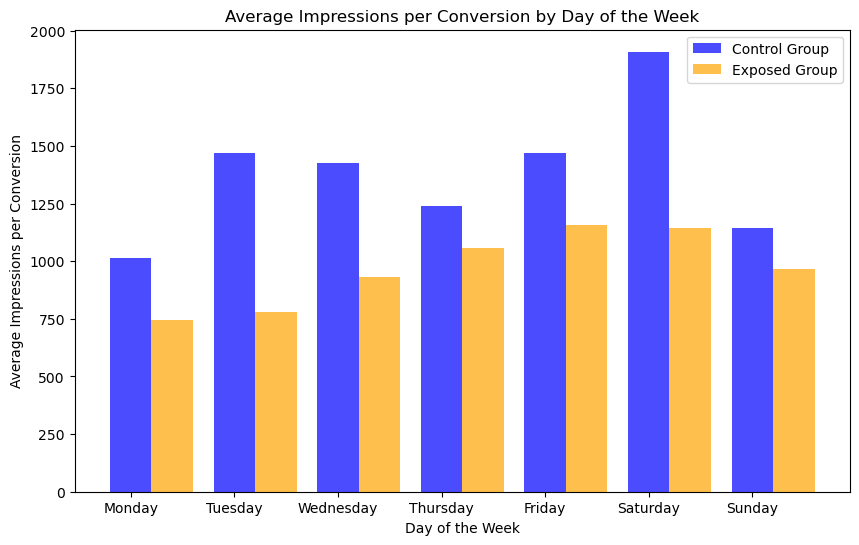

In [255]:
grouped_data = df.groupby(['test', 'mode_impr_day']).agg({'tot_impr': 'sum', 'converted': 'sum'})
grouped_data['avg_impressions_per_conversion'] = grouped_data['tot_impr'] / grouped_data['converted']
control_data = grouped_data.loc[0]
exposed_data = grouped_data.loc[1]
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ]

plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(7)

plt.bar(index, control_data['avg_impressions_per_conversion'], width=bar_width, label='Control Group', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index], exposed_data['avg_impressions_per_conversion'], width=bar_width, label='Exposed Group', color='orange', alpha=0.7)
plt.xlabel('Day of the Week')
plt.ylabel('Average Impressions per Conversion')
plt.title('Average Impressions per Conversion by Day of the Week')
plt.xticks(index, days_of_week)  
plt.legend()
plt.show()

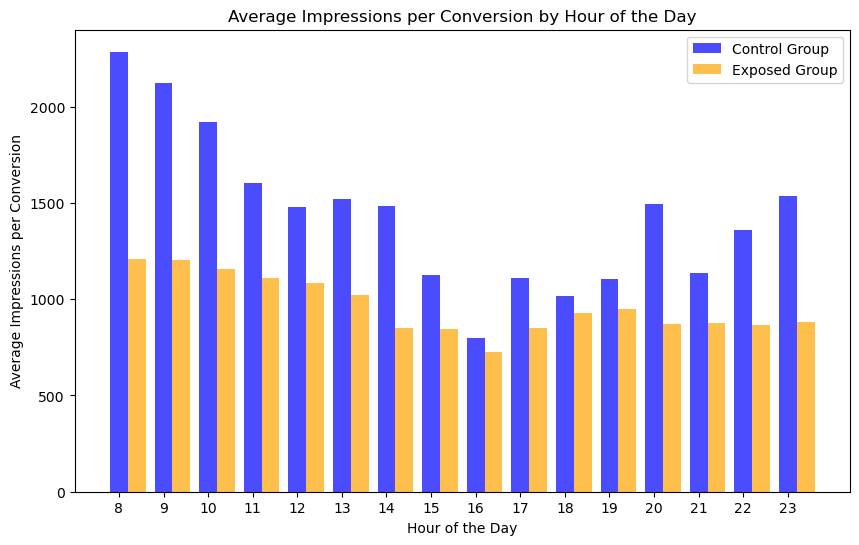

In [256]:
grouped_data_hourly = df.groupby(['test', 'mode_impr_hour']).agg({'tot_impr': 'sum', 'converted': 'sum'})
grouped_data_hourly['avg_impressions_per_conversion'] = grouped_data_hourly['tot_impr'] / grouped_data_hourly['converted']
control_data_hourly = grouped_data_hourly.loc[0]
exposed_data_hourly = grouped_data_hourly.loc[1]
hours_of_day = range(8, 24)
plt.figure(figsize=(10, 6))
bar_width = 0.4
index_hourly = range(len(hours_of_day)) 
plt.bar(index_hourly, control_data_hourly['avg_impressions_per_conversion'], width=bar_width, label='Control Group', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index_hourly], exposed_data_hourly['avg_impressions_per_conversion'], width=bar_width, label='Exposed Group', color='orange', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Impressions per Conversion')
plt.title('Average Impressions per Conversion by Hour of the Day')
plt.xticks(index_hourly, hours_of_day) 
plt.legend()
plt.show()

- As per the visualisation Monday and Tuesday seem to have a higher conversion rate of more than 3% which tends to reduce over the next few days and again increase as the weekend approaches. This can be attributed to users starting to see the ads with the onset of the weekend, consider the purchase during weekend and ultimately purchase on Monday and Tuesday. 

- We can see from the data that  advertising seems to be more effective at the start of the week (Monday/ Tuesday) where the average impression per conversion is less and less effective later in the week as this metric is high.

- 14:00  to 16:00 hours is the time when most of the conversions are happening and the impressions per conversion is low for the exposed group. This upward trend is observed starting from 10:00 am achieving the peak at 16:00 hours. 
- From the chart above it can be seen that advertising is more effective from the afternoon to the evening  with promising trends till 21:00. Within this timeframe the conversion rate for the exposed group is consistently above 2.5% and is at its maximum at 16:00 where it is approximately 3%.

- Least effective advertising days could be Thursday, Friday and Saturday with low conversion rates and times prior to the afternoon. The company should target their advertising campaigns from Sunday, through Monday and Tuesday and post afternoon time. 
 